In [1]:
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open
from urllib.request import urlopen
import re
import os

In [2]:
def read_pdf_file(pdfFile):
    pdfrm = PDFResourceManager()
    strio = StringIO()
    lapa = LAParams()
    device = TextConverter(pdfrm, strio, laparams = lapa)
    
    process_pdf(pdfrm, device, pdfFile)
    device.close()
    
    content = strio.getvalue()
    strio.close()
    return content

In [3]:
pdf_samsung = open("지속가능경영/environment/LG생활건강.pdf", "rb")
a = read_pdf_file(pdf_samsung)
pdf_samsung.close() 

In [4]:
sentence = a
tokens = list(sentence.lower().split())
print(len(tokens))

32927


- vocab

In [6]:
vocab, index = {}, 1  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token
for token in tokens:
    if token not in vocab:
        vocab[token] = index
        index += 1
vocab_size = len(vocab)

In [7]:
inverse_vocab = {index: token for token, index in vocab.items()}

In [27]:
df_1 = pd.DataFrame(list(vocab.items()), columns=["keyword", "idx"])

In [28]:
df_1

,keyword,idx
0,<pad>,0
1,2020,1
2,lg생활건강,2
3,esg,3
4,보고서,4
...,...,...
12719,발행인,12719
12720,디자인,12720
12721,reddot,12721
12722,branding,12722


In [8]:
import pandas as pd

In [39]:
df_2 = pd.read_csv("지속가능경영/environment_top5.csv", sep=",")

In [40]:
df_2

,Unnamed: 0,keyword,score
0,0,관리,3.499084e-08
1,1,제품,3.251817e-08
2,2,환경,2.950111e-08
3,3,협력,2.896492e-08
4,4,사업,2.850662e-08
...,...,...,...
4995,4995,무공,1.078405e-10
4996,4996,결권,1.078385e-10
4997,4997,토단,1.078369e-10
4998,4998,안면,1.078302e-10


In [41]:
df_12 = pd.merge(df_1, df_2, how='right', on='keyword')
df_12

,keyword,idx,Unnamed: 0,score
0,관리,247.0,0,3.499084e-08
1,제품,206.0,1,3.251817e-08
2,환경,218.0,2,2.950111e-08
3,협력,2013.0,3,2.896492e-08
4,사업,316.0,4,2.850662e-08
...,...,...,...,...
4995,무공,NaN,4995,1.078405e-10
4996,결권,NaN,4996,1.078385e-10
4997,토단,NaN,4997,1.078369e-10
4998,안면,NaN,4998,1.078302e-10


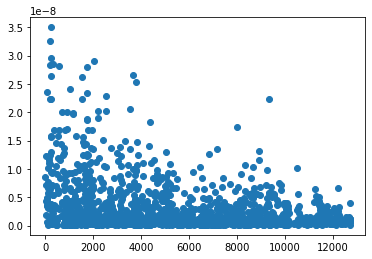

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x = df_12['idx']
y = df_12['score']

plt.scatter(x, y)
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48716 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45909 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47701 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 55064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46028 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52860 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54841 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48731 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50937 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-package

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54645 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54732 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50997 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45684 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48716 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46377 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49905 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47605 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47100 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45392 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44172 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49453 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50837 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44340 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53916 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52377 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47736 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49397 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54609 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50773 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 55072 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50630 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53665 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53472 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54045 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53952 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54635 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rnru1\anaconda3\envs\abangues\lib\site-packages\matplotl

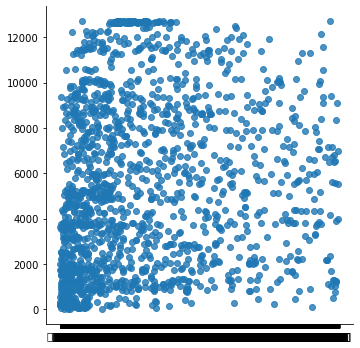

In [43]:
import seaborn as sns
ax = sns.lmplot(x="keyword", y = 'idx', data=df_12)

In [ ]:
df['label'] = df["keyword"].apply(keys1)

In [ ]:
df

In [ ]:
k = []
for i in df["keyword"]:
    k.append(i)